<a href="https://colab.research.google.com/github/darklucifar/machineLearn_0602/blob/main/cifar10_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
names = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

ship


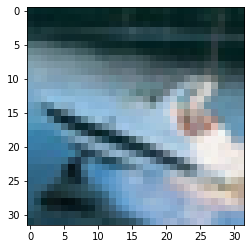

In [12]:
# mnist: (60000, ) [5, 2, 1, 0]
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個) * 128 + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

In [16]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [17]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 35s - loss: 1.8623 - accuracy: 0.3072 - val_loss: 1.6147 - val_accuracy: 0.3950
Epoch 2/100
225/225 - 3s - loss: 1.5592 - accuracy: 0.4320 - val_loss: 1.4637 - val_accuracy: 0.4616
Epoch 3/100
225/225 - 3s - loss: 1.4179 - accuracy: 0.4878 - val_loss: 1.3578 - val_accuracy: 0.5088
Epoch 4/100
225/225 - 3s - loss: 1.3378 - accuracy: 0.5162 - val_loss: 1.2940 - val_accuracy: 0.5298
Epoch 5/100
225/225 - 3s - loss: 1.2623 - accuracy: 0.5465 - val_loss: 1.1966 - val_accuracy: 0.5708
Epoch 6/100
225/225 - 3s - loss: 1.1936 - accuracy: 0.5744 - val_loss: 1.1757 - val_accuracy: 0.5864
Epoch 7/100
225/225 - 3s - loss: 1.1494 - accuracy: 0.5917 - val_loss: 1.1299 - val_accuracy: 0.5906
Epoch 8/100
225/225 - 3s - loss: 1.0945 - accuracy: 0.6140 - val_loss: 1.0578 - val_accuracy: 0.6294
Epoch 9/100
225/225 - 3s - loss: 1.0629 - accuracy: 0.6242 - val_loss: 1.0728 - val_accuracy: 0.6214
Epoch 10/100
225/225 - 3s - loss: 1.0279 - accuracy: 0.6372 - val_loss: 0.9988 - val_accur

In [19]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6555 - accuracy: 0.7773


[0.6555185317993164, 0.7773000001907349]

In [20]:
pre = model.predict_classes(x_test_norm)
print(y_test.shape)
print(pre.shape)
# -1: 叫他幫你算 10000 * 1 = -1(?)
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(10000, 1)
(10000,)
(10000,)


In [22]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow: 就帶one-hot y_test_cat
# 不在: 帶原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(names[i]) for i in range(10)],
      index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),795,14,35,7,7,8,5,14,86,29
automobile(正確),17,864,5,3,2,4,4,3,25,73
bird(正確),68,3,672,39,50,59,52,33,15,9
cat(正確),19,4,61,558,21,211,51,39,24,12
deer(正確),24,2,52,41,679,54,40,92,15,1
dog(正確),17,3,21,99,22,764,14,45,8,7
frog(正確),4,2,43,47,26,32,827,7,9,3
horse(正確),16,2,21,18,21,60,3,852,0,7
ship(正確),42,13,8,9,0,5,2,4,895,22
truck(正確),26,51,6,9,1,6,1,10,23,867


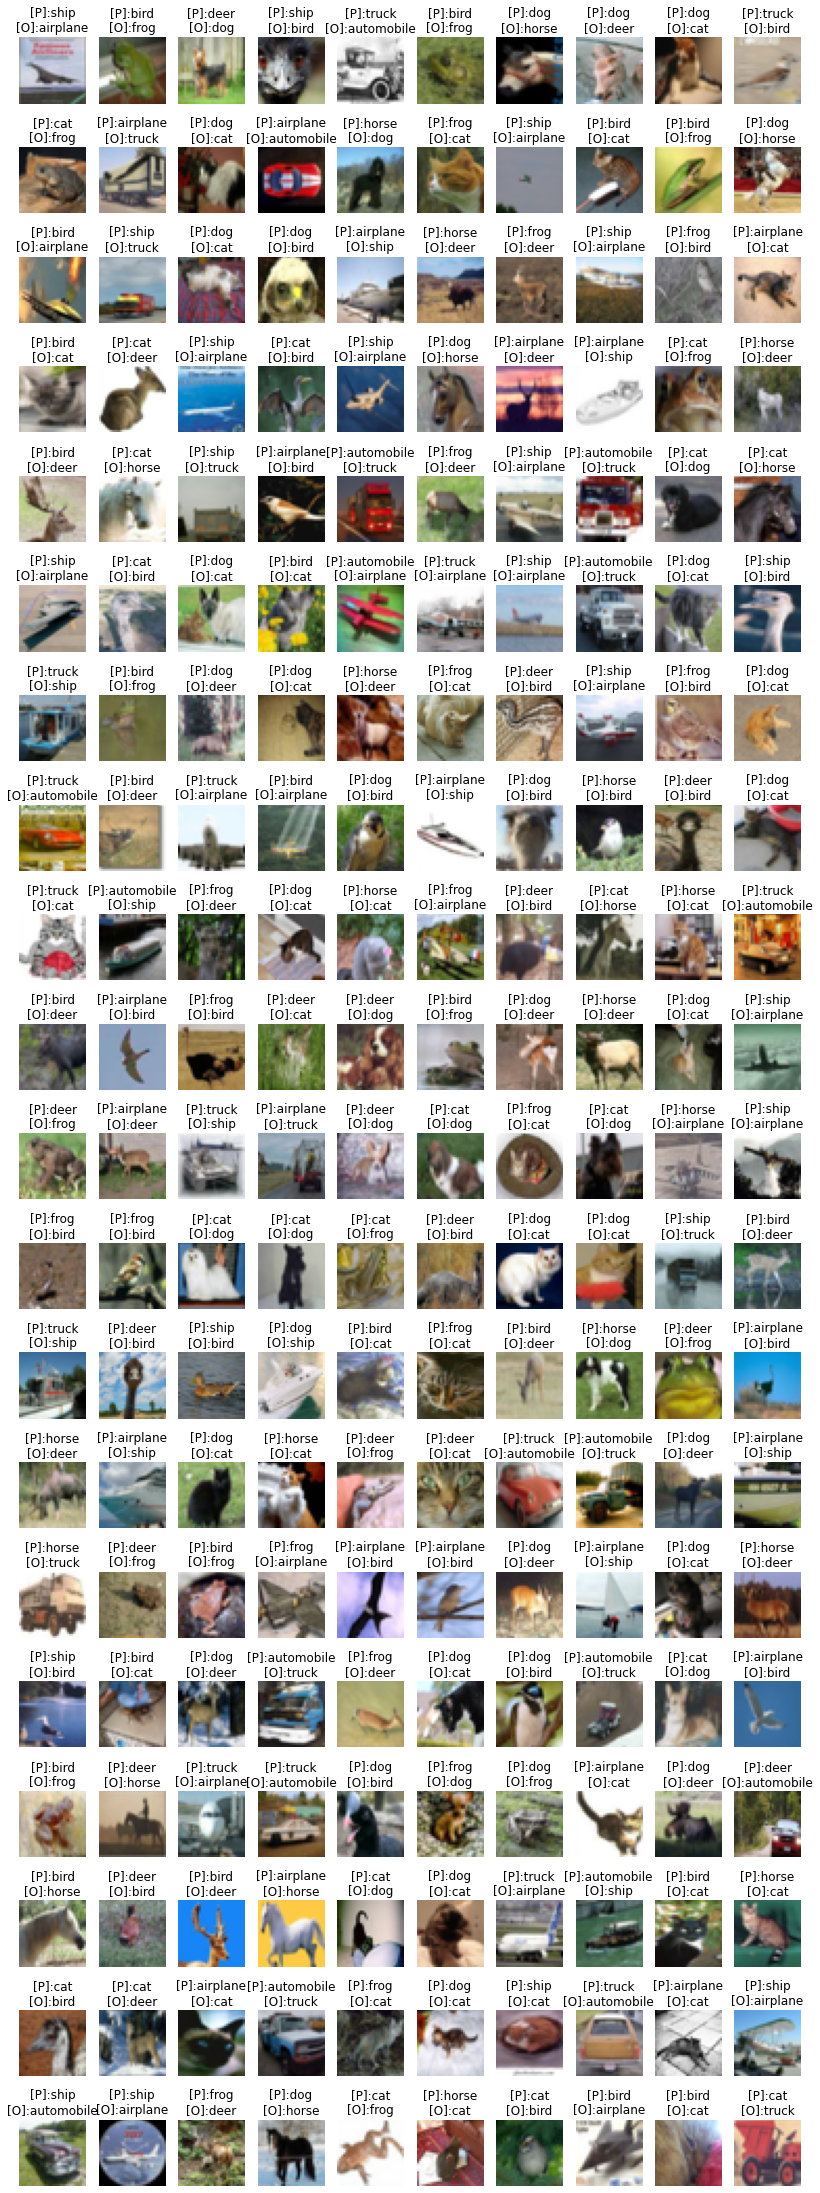

In [23]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test_r[idx] 
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

輸入網址:http://mx.yanyi8.com/upload/yy/20144/1242583.jpg
airplane 的機率: 0.005
automobile 的機率: 0.0
bird 的機率: 0.422
cat 的機率: 0.067
deer 的機率: 0.0
dog 的機率: 0.489
frog 的機率: 0.0
horse 的機率: 0.017
ship 的機率: 0.0
truck 的機率: 0.0


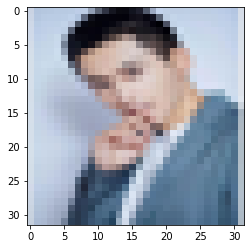

In [31]:
import requests
from PIL import Image
url = input("輸入網址:")
response = requests.get(url, verify=False, stream=True)
img = Image.open(response.raw)
img = img.resize((32, 32)).convert("RGB")
img_np = np.array(img)
img_norm = np.array([img_np]) / 255
pre = model.predict(img_norm)[0]
for n, p in zip(names, pre):
    print(n, "的機率:", round(p, 3))
plt.imshow(img)